In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [3]:
cancer = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\breast-cancer-unsupervised-ad.csv", header = None)

In [4]:
cancer

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,n
363,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,n
364,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,n
365,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,n


In [5]:
shuffled_df = cancer.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,n
1,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.01510,0.1678,0.07126,...,18.45,63.30,275.6,0.1641,0.22350,0.17540,0.08512,0.2983,0.10490,n
2,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.04796,0.1771,0.06072,...,15.77,76.53,434.0,0.1367,0.18220,0.08669,0.08611,0.2102,0.06784,n
3,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.05941,0.2188,0.08450,...,22.82,76.51,351.9,0.1143,0.36190,0.60300,0.14650,0.2597,0.12000,n
4,13.460,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.01117,0.1421,0.05763,...,35.63,97.11,680.6,0.1108,0.14570,0.07934,0.05781,0.2694,0.07061,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,12.650,18.17,82.69,485.6,0.10760,0.13340,0.080170,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.38420,0.35820,0.14070,0.3230,0.10330,n
363,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.01770,0.1739,0.05677,...,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,n
364,11.290,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.02755,0.1769,0.06270,...,16.18,78.27,457.5,0.1358,0.15070,0.12750,0.08750,0.2733,0.08022,n
365,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.01924,0.1638,0.06100,...,17.48,88.54,553.7,0.1298,0.14720,0.05233,0.06343,0.2369,0.06922,n


In [6]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.559812,0.871245,-0.605337,-0.590149,0.624601,-0.597251,-0.828115,-0.852718,-0.536466,-0.234305,...,-0.514810,0.964778,-0.561332,-0.554363,0.105963,-0.705890,-0.901431,-0.838034,0.488689,-0.566267
1,-1.888201,-1.212083,-1.864741,-1.604498,0.753409,-0.168719,-0.488887,-0.632966,-0.289883,1.147272,...,-1.760572,-0.928209,-1.560476,-1.398469,1.814856,0.278896,-0.005102,0.169600,0.502881,1.490208
2,-0.498241,-1.139380,-0.448104,-0.561441,1.669377,0.797163,-0.068281,1.030871,0.074121,-0.335601,...,-0.704673,-1.412756,-0.732238,-0.665430,0.510576,-0.081988,-0.574763,0.193317,-1.283308,-0.773319
3,-0.862535,0.572911,-0.666697,-0.858090,-0.167567,2.154786,3.622687,1.610632,1.706267,3.010009,...,-1.166386,-0.138108,-0.733490,-1.045370,-0.555697,1.488252,2.740782,1.640084,-0.279717,2.412476
4,0.620295,2.576015,0.540551,0.569654,-1.281040,-0.921630,-0.751816,-0.831958,-1.295785,-0.770334,...,0.490603,2.177953,0.556131,0.475779,-0.722302,-0.400930,-0.621962,-0.484668,-0.083054,-0.604135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.204692,0.058973,0.295113,0.081618,1.039649,1.310158,0.618911,1.171634,-0.434701,0.764595,...,0.356836,-0.259245,0.442194,0.258737,1.300760,1.683112,1.168770,1.501133,1.003663,1.392484
363,-0.036460,0.648121,-0.124433,-0.089992,-0.926103,-1.099882,-0.525868,-0.501317,-0.051128,-0.891327,...,-0.091932,1.673518,-0.228284,-0.138789,-0.650900,-0.899701,-0.396178,-0.089376,-0.083054,-0.715907
364,-0.493110,-1.227125,-0.507162,-0.541026,0.377004,-0.174937,-0.346653,-0.002571,0.066293,-0.057035,...,-0.532070,-1.338628,-0.623309,-0.556677,0.467734,-0.357239,-0.312697,0.226617,-0.003983,-0.017182
365,0.240608,-1.041606,0.225316,0.123085,0.257499,0.028447,-0.748362,-0.423340,-0.446443,-0.296208,...,-0.022891,-1.103586,0.019624,-0.111485,0.182126,-0.387822,-0.795410,-0.350029,-0.741977,-0.689033


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

11


In [13]:
pca = PCA(n_components=11)
new_df = pca.fit_transform(df)

In [14]:
new_df

array([[-2.40029415, -1.03144661,  0.84089293, ...,  0.43374998,
         0.49855581, -0.15963684],
       [-1.4583914 , -3.98850205, -3.48940773, ...,  0.203437  ,
        -0.085316  ,  0.11252325],
       [ 0.51328233, -1.43083696,  0.11122879, ..., -0.38598748,
         0.46292619, -0.85045893],
       ...,
       [-1.36164242, -0.62232982, -2.21686362, ..., -0.17316832,
         0.06432071, -0.16094651],
       [-1.94750049,  1.03823485, -1.60188368, ..., -0.42181155,
         0.31075419, -0.18566222],
       [-2.19297727, -2.80528059, -0.75166656, ..., -0.14901848,
        -0.00665352, -0.09552063]])

In [15]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10
0,-2.400294,-1.031447,0.840893,0.153135,-1.656117,0.094475,-0.113035,0.114665,0.433750,0.498556,-0.159637
1,-1.458391,-3.988502,-3.489408,0.856073,0.319734,-0.637199,0.950847,-0.791352,0.203437,-0.085316,0.112523
2,0.513282,-1.430837,0.111229,1.803393,1.574754,-2.336218,-1.318206,-0.549640,-0.385987,0.462926,-0.850459
3,6.672965,-4.936832,-1.519719,-4.061283,3.074464,0.089662,-1.422385,-0.286170,-1.721979,-0.063995,0.142403
4,-2.599083,2.306319,0.306159,-2.845653,-1.917052,-0.130386,0.190284,0.519093,-0.305612,-0.649902,-0.547117
...,...,...,...,...,...,...,...,...,...,...,...
362,2.877613,0.117079,-2.867157,-0.132710,-0.846153,-0.459297,0.592749,-0.095621,0.419941,0.477539,-0.578553
363,-2.759787,0.895716,0.010873,-1.525241,-1.168609,0.177118,-0.802205,-0.498850,-0.289331,-0.068537,0.497095
364,-1.361642,-0.622330,-2.216864,1.296514,0.971011,-0.158997,-0.261295,-0.392129,-0.173168,0.064321,-0.160947
365,-1.947500,1.038235,-1.601884,1.036269,0.947907,-0.803314,-0.150288,0.099818,-0.421812,0.310754,-0.185662


Base Case of Algorithms

In [16]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [17]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [18]:
y

,30
0,0
1,0
2,0
3,0
4,0
...,...
362,0
363,0
364,0
365,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

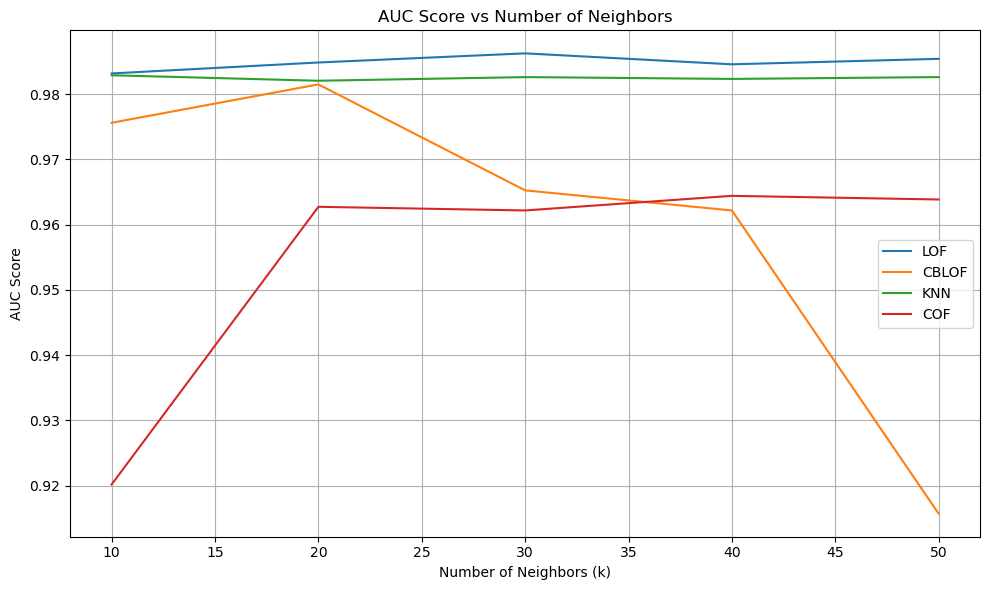

In [19]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.9825210084033614
LOF auc 0.984873949579832
CBLOF auc 0.9600560224089636
COF auc 0.9546778711484594
KNN acc 0.9264305177111718
LOF acc 0.9264305177111718
CBLOF acc 0.9188010899182562
COF acc 0.9188010899182562
